In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/finaljointstc-time-added/test_tc_time.csv
/kaggle/input/final-dm-2020/test_data.csv
/kaggle/input/final-dm-2020/train_data.csv
/kaggle/input/final-dm-2020/sample_submission.csv


In [2]:
test_tctime = pd.read_csv('/kaggle/input/finaljointstc-time-added/test_tc_time.csv')
tctime_test = test_tctime.tc_time
test_tctime.head()

,duration,width,height,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,...,frame_class_High Framerate,frame_class_Low Framerate,codec_High Framerate,codec_flv,codec_h264,codec_mpeg4,codec_vp8,tc_frame_class_High Framerate,tc_frame_class_Low Framerate,tc_time
0,256.2,176.0,360.0,57565.0,56.0,3018.0,5628.0,302900.0,1540700.0,1843600.0,...,1,0,0,0,1,0,0,0,1,12.244298
1,74.5,176.0,144.0,291150.0,15.0,879.0,5628.0,945865.0,491276.0,515272.0,...,1,0,1,0,0,0,0,1,0,2.185167
2,239.1,480.0,144.0,53707.0,37.0,2091.0,2128.0,100969.0,1089548.0,1190517.0,...,1,0,0,0,1,0,0,1,0,6.536046
3,282.6,640.0,360.0,559834.0,145.0,6920.0,5628.0,4966509.0,6166260.0,7881069.0,...,1,0,0,0,0,0,1,1,0,17.776205
4,239.1,320.0,240.0,272273.0,23.0,1081.0,1104.0,945865.0,1354404.0,7881069.0,...,1,0,0,0,0,0,1,1,0,6.202152


In [3]:
sample = pd.read_csv('/kaggle/input/final-dm-2020/sample_submission.csv')
train = pd.read_csv('/kaggle/input/final-dm-2020/train_data.csv')
test = pd.read_csv('/kaggle/input/final-dm-2020/test_data.csv')

In [4]:
train.columns

Index(['video', 'duration', 'width', 'height', 'frame_class', 'bitrate',
       'intracoded_frame', 'predicted_frame', 'total_frame', 'intracoded_size',
       'predicted_size', 'total_size', 'codec', 'tc_width', 'tc_height',
       'tc_frame_class', 'tc_bitrate', 'tc_time', 'time_class'],
      dtype='object')

In [5]:
test.columns

Index(['video', 'duration', 'width', 'height', 'frame_class', 'bitrate',
       'intracoded_frame', 'predicted_frame', 'total_frame', 'intracoded_size',
       'predicted_size', 'total_size', 'codec', 'tc_width', 'tc_height',
       'tc_frame_class', 'tc_bitrate'],
      dtype='object')

In [6]:
target = np.empty(len(train))
for i,val in enumerate(train['time_class']):
    if val == 'A':
        target[i] =int(0)
    if val == 'B':
        target[i] = int(1)
    if val == 'C':
        target[i] = int(2)
    if val == 'D':
        target[i] = int(3)
        

In [7]:
target[:10]

array([0., 3., 2., 3., 0., 1., 0., 0., 0., 3.])

In [8]:
train.head()

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,tc_time,time_class
0,1,282.6,640.0,480.0,High Framerate,NaN,NaN,6920.0,7065.0,NaN,14806840.0,19773349.0,h264,NaN,360.0,Low Framerate,3000000.0,NaN,A
1,2,339.7,640.0,480.0,High Framerate,NaN,181.0,10010.0,10191.0,NaN,820261.0,NaN,NaN,1920.0,NaN,High Framerate,820000.0,5.64,D
2,3,239.1,480.0,360.0,High Framerate,500198.0,NaN,5868.0,NaN,1406751.0,13545526.0,14952277.0,h264,640.0,480.0,NaN,539000.0,NaN,C
3,4,714.4,1280.0,720.0,High Framerate,652356.0,143.0,NaN,NaN,14532530.0,43720516.0,58253046.0,vp8,1280.0,720.0,High Framerate,5000000.0,80.68,D
4,5,645.8,320.0,240.0,NaN,95903.0,138.0,16008.0,16146.0,NaN,6660941.0,7742262.0,vp8,320.0,240.0,High Framerate,56000.0,NaN,A


In [9]:
train.shape

(48148, 19)

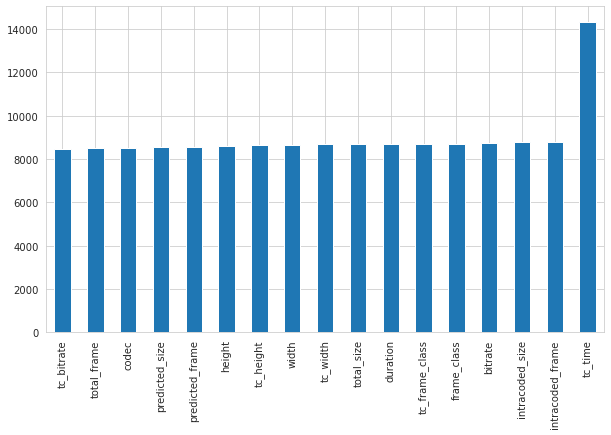

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
missing = train.isna().sum()
missing = missing[missing>0]
missing.sort_values().plot.bar()

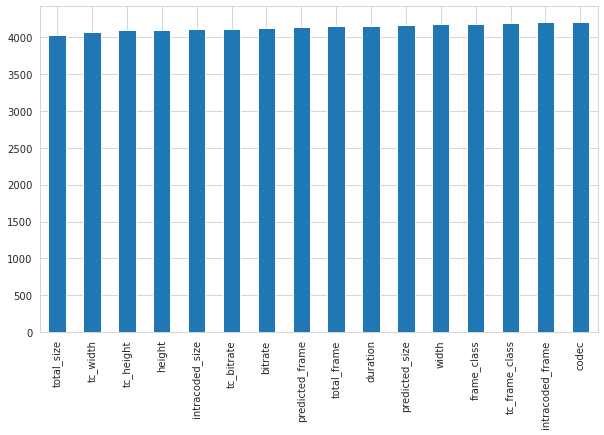

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
missing = test.isna().sum()
missing = missing[missing>0]
missing.sort_values().plot.bar()

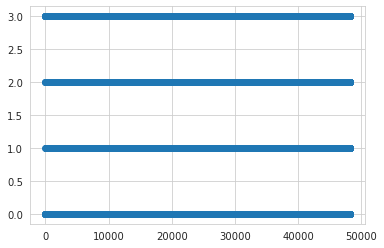

In [12]:
plt.scatter(train['video'], target)

In [13]:
train.time_class.value_counts()

A    12138
C    12127
B    11969
D    11914
Name: time_class, dtype: int64

In [14]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('video')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
qualitative.remove('time_class')


In [15]:
quantitative

['duration',
 'width',
 'height',
 'bitrate',
 'intracoded_frame',
 'predicted_frame',
 'total_frame',
 'intracoded_size',
 'predicted_size',
 'total_size',
 'tc_width',
 'tc_height',
 'tc_bitrate',
 'tc_time']

In [16]:
qualitative

['frame_class', 'codec', 'tc_frame_class']

In [17]:
merged = pd.concat([train,test])

In [18]:
display(merged['frame_class'].unique())
display(merged['codec'].unique())
display(merged['tc_frame_class'].unique())

array(['High Framerate', nan, 'Low Framerate'], dtype=object)

array(['h264', nan, 'vp8', 'mpeg4', 'flv'], dtype=object)

array(['Low Framerate', 'High Framerate', nan], dtype=object)

In [19]:
merged['frame_class'] = merged['frame_class'].fillna('Missing Framerate')
merged['codec'] = merged['codec'].fillna('Missing codec')
merged['tc_frame_class'] = merged['tc_frame_class'].fillna('tc Missing Framerate')

In [20]:
display(merged['frame_class'].unique())
display(merged['codec'].unique())
display(merged['tc_frame_class'].unique())

array(['High Framerate', 'Missing Framerate', 'Low Framerate'],
      dtype=object)

array(['h264', 'Missing codec', 'vp8', 'mpeg4', 'flv'], dtype=object)

array(['Low Framerate', 'High Framerate', 'tc Missing Framerate'],
      dtype=object)

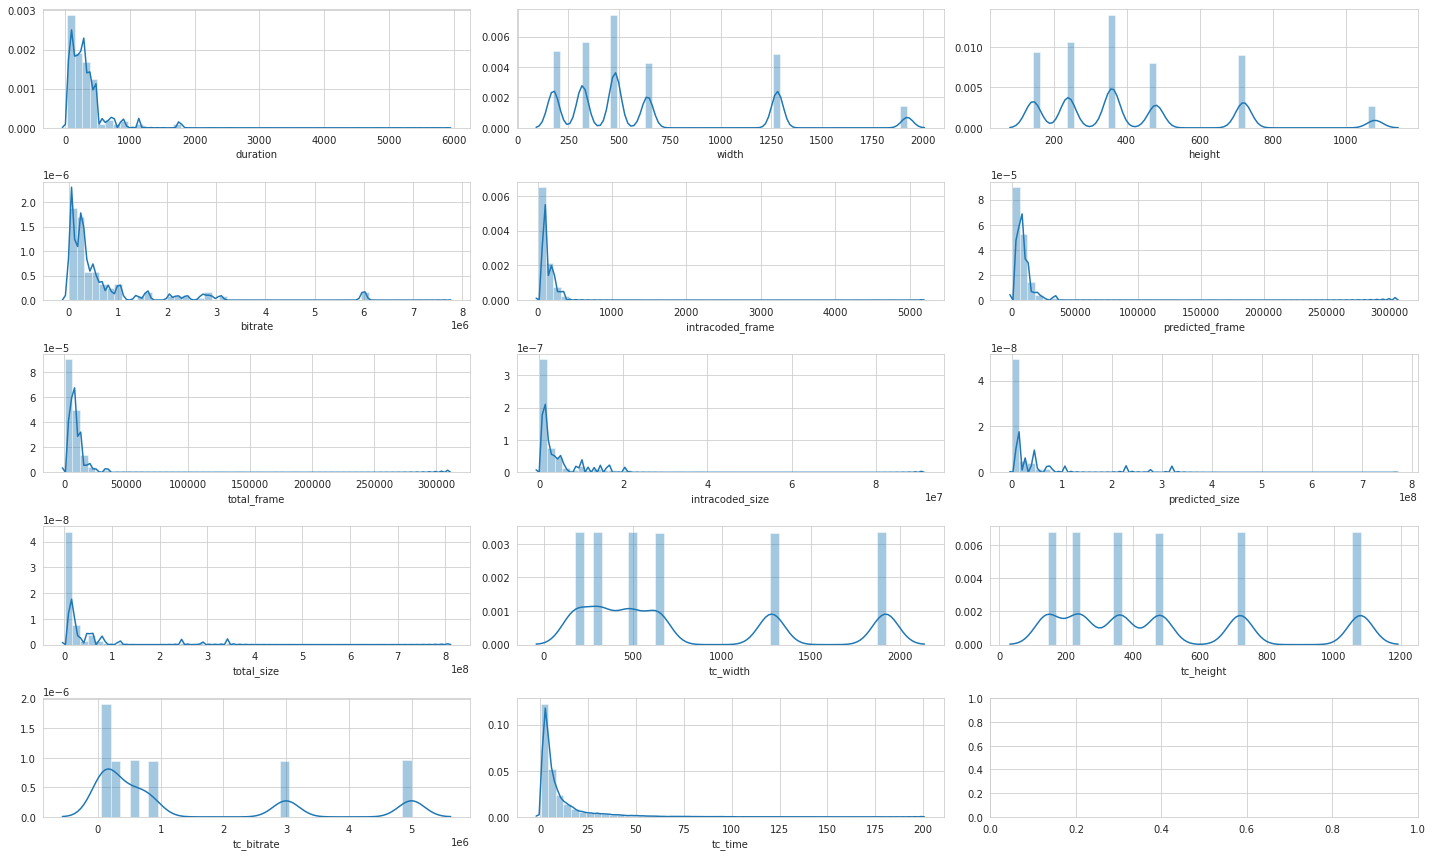

In [21]:
import math
fig, axes = plt.subplots(math.ceil(len(quantitative) / 3), 3, figsize=(20, 12))
axes = axes.flatten()
for ax, quan in zip(axes, quantitative):
    sns.distplot(merged[quan], kde=True, ax=ax)
    ax.set_xlabel(quan)
    
plt.tight_layout()

In [22]:
num = [i for i in quantitative if merged[i].nunique() > 10]
ordinal = [i for i in quantitative if merged[i].nunique() < 10]

In [23]:
num

['duration',
 'bitrate',
 'intracoded_frame',
 'predicted_frame',
 'total_frame',
 'intracoded_size',
 'predicted_size',
 'total_size',
 'tc_time']

In [24]:
ordinal

['width', 'height', 'tc_width', 'tc_height', 'tc_bitrate']

In [25]:
from statistics import mode 
for i in num:
    merged[i] = merged.groupby(['frame_class','codec','tc_frame_class'])[i].transform(lambda x: x.fillna(-1))
for i in ordinal:
    try:
        merged[i] = merged.groupby(['frame_class','codec','tc_frame_class'])[i].transform(lambda x: x.fillna(-1))
    except:
        merged[i] = merged.groupby(['frame_class','codec','tc_frame_class'])[i].transform(lambda x: x.fillna(-1))

In [26]:
merged.isna().sum()

video                   0
duration                0
width                   0
height                  0
frame_class             0
bitrate                 0
intracoded_frame        0
predicted_frame         0
total_frame             0
intracoded_size         0
predicted_size          0
total_size              0
codec                   0
tc_width                0
tc_height               0
tc_frame_class          0
tc_bitrate              0
tc_time                 0
time_class          20636
dtype: int64

In [27]:
for i in quantitative:
    try: merged[merged[i] <0][0]
    except: print('No Negative values')

No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values
No Negative values


In [28]:
merged.head()

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,tc_time,time_class
0,1,282.6,640.0,480.0,High Framerate,-1.0,-1.0,6920.0,7065.0,-1.0,14806840.0,19773349.0,h264,-1.0,360.0,Low Framerate,3000000.0,-1.00,A
1,2,339.7,640.0,480.0,High Framerate,-1.0,181.0,10010.0,10191.0,-1.0,820261.0,-1.0,Missing codec,1920.0,-1.0,High Framerate,820000.0,5.64,D
2,3,239.1,480.0,360.0,High Framerate,500198.0,-1.0,5868.0,-1.0,1406751.0,13545526.0,14952277.0,h264,640.0,480.0,tc Missing Framerate,539000.0,-1.00,C
3,4,714.4,1280.0,720.0,High Framerate,652356.0,143.0,-1.0,-1.0,14532530.0,43720516.0,58253046.0,vp8,1280.0,720.0,High Framerate,5000000.0,80.68,D
4,5,645.8,320.0,240.0,Missing Framerate,95903.0,138.0,16008.0,16146.0,-1.0,6660941.0,7742262.0,vp8,320.0,240.0,High Framerate,56000.0,-1.00,A


- frame_class:
    - high = 0
    - missing = 2
    - low = 1
- codec:
    - h264 = 2
    - missing = 0
    - vp8 = 4
    - flv =
    - mpeg4 = 
    
- tc_frame_class:
    - low = 1
    - high = 0
    - missing = 2

In [29]:
from sklearn import preprocessing
for i in qualitative:
    lbl = preprocessing.LabelEncoder()
    merged[i] = lbl.fit_transform(merged[i])
merged.head()

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,tc_time,time_class
0,1,282.6,640.0,480.0,0,-1.0,-1.0,6920.0,7065.0,-1.0,14806840.0,19773349.0,2,-1.0,360.0,1,3000000.0,-1.00,A
1,2,339.7,640.0,480.0,0,-1.0,181.0,10010.0,10191.0,-1.0,820261.0,-1.0,0,1920.0,-1.0,0,820000.0,5.64,D
2,3,239.1,480.0,360.0,0,500198.0,-1.0,5868.0,-1.0,1406751.0,13545526.0,14952277.0,2,640.0,480.0,2,539000.0,-1.00,C
3,4,714.4,1280.0,720.0,0,652356.0,143.0,-1.0,-1.0,14532530.0,43720516.0,58253046.0,4,1280.0,720.0,0,5000000.0,80.68,D
4,5,645.8,320.0,240.0,2,95903.0,138.0,16008.0,16146.0,-1.0,6660941.0,7742262.0,4,320.0,240.0,0,56000.0,-1.00,A


In [30]:
merged['width_mean'] = (merged['width'] + merged['tc_width'])/2
merged['height_mean'] = (merged['height'] + merged['tc_height'])/2
merged['bitrate_mean'] = (merged['bitrate'] + merged['tc_bitrate'])/2


In [31]:
merged.head()

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,...,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,tc_time,time_class,width_mean,height_mean,bitrate_mean
0,1,282.6,640.0,480.0,0,-1.0,-1.0,6920.0,7065.0,-1.0,...,2,-1.0,360.0,1,3000000.0,-1.00,A,319.5,420.0,1499999.5
1,2,339.7,640.0,480.0,0,-1.0,181.0,10010.0,10191.0,-1.0,...,0,1920.0,-1.0,0,820000.0,5.64,D,1280.0,239.5,409999.5
2,3,239.1,480.0,360.0,0,500198.0,-1.0,5868.0,-1.0,1406751.0,...,2,640.0,480.0,2,539000.0,-1.00,C,560.0,420.0,519599.0
3,4,714.4,1280.0,720.0,0,652356.0,143.0,-1.0,-1.0,14532530.0,...,4,1280.0,720.0,0,5000000.0,80.68,D,1280.0,720.0,2826178.0
4,5,645.8,320.0,240.0,2,95903.0,138.0,16008.0,16146.0,-1.0,...,4,320.0,240.0,0,56000.0,-1.00,A,320.0,240.0,75951.5


In [32]:
X = merged.iloc[: len(train)]

X.drop(['time_class','video','tc_time'],axis=1,inplace=True)
test_post = merged.iloc[len(train):]
train_post = merged.iloc[: len(train)]


In [33]:
from sklearn.model_selection import StratifiedKFold

# Some useful parameters which will come in handy later on
ntrain = merged.iloc[:len(train)].shape[0]
ntest = merged.iloc[len(train):].shape[0]
SEED = 0 # for reproducibility
NFOLDS = 4 # set folds for out-of-fold prediction
skf = StratifiedKFold(n_splits=NFOLDS, random_state=SEED)

In [34]:
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from catboost import CatBoostClassifier

In [35]:
xgb = XGBClassifier(scale_pos_weight = (target.shape[0]-target.sum()) / target.sum())

In [36]:
target = pd.Series(target)

In [37]:
scores = 0
np.random.seed(1)

for i,(train_index, test_index) in enumerate(skf.split(X,target)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    xgb.fit(X_train,y_train)
    scores += xgb.score(X_test,y_test)
    
print(scores/4)

0.7123452687546732


ada video: 0.771
<t> tanpa video: 0.8312
<t> missing value -1 : 0.8479
<t> no tc_time : 0.716

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
scores = 0
np.random.seed(1)

for i,(train_index, test_index) in enumerate(skf.split(X,target)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    logreg.fit(X_train,y_train)
    scores += logreg.score(X_test,y_test)
    
print(scores/4)

0.2803854781091634


ada video : 0.2844
<t> tanpa video : 0.2817

In [40]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 2, random_state = 1, shuffle = True)
np.random.seed(1)
from sklearn.metrics import mean_squared_error

scores = 0
for i,(train_index, test_index) in enumerate(kf.split(X,target)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    xgb.fit(X_train,y_train)
    scores += xgb.score(X_test,y_test)
    
print(scores/4)

0.353867242668439


## BOOSTING SCORE !

In [41]:
train_post2 = train_post.copy()
test_post2 = test_post.copy()
X2 = X.copy()
train_post2['time_class'] = target

In [42]:
train_post2.head()

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,...,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,tc_time,time_class,width_mean,height_mean,bitrate_mean
0,1,282.6,640.0,480.0,0,-1.0,-1.0,6920.0,7065.0,-1.0,...,2,-1.0,360.0,1,3000000.0,-1.00,0.0,319.5,420.0,1499999.5
1,2,339.7,640.0,480.0,0,-1.0,181.0,10010.0,10191.0,-1.0,...,0,1920.0,-1.0,0,820000.0,5.64,3.0,1280.0,239.5,409999.5
2,3,239.1,480.0,360.0,0,500198.0,-1.0,5868.0,-1.0,1406751.0,...,2,640.0,480.0,2,539000.0,-1.00,2.0,560.0,420.0,519599.0
3,4,714.4,1280.0,720.0,0,652356.0,143.0,-1.0,-1.0,14532530.0,...,4,1280.0,720.0,0,5000000.0,80.68,3.0,1280.0,720.0,2826178.0
4,5,645.8,320.0,240.0,2,95903.0,138.0,16008.0,16146.0,-1.0,...,4,320.0,240.0,0,56000.0,-1.00,0.0,320.0,240.0,75951.5


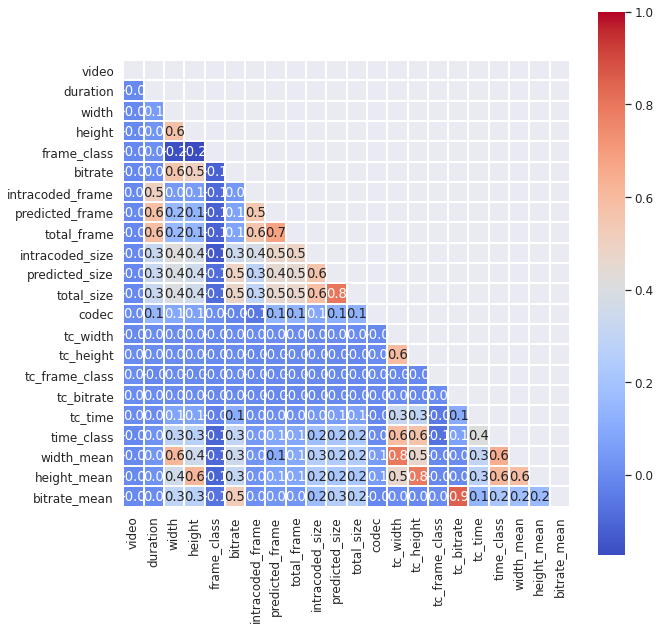

In [43]:
# Display numerical correlations between features on heatmap
sns.set(font_scale=1.1)
correlation_train = train_post2.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1)

plt.show()

In [44]:
ordinal + qualitative

['width',
 'height',
 'tc_width',
 'tc_height',
 'tc_bitrate',
 'frame_class',
 'codec',
 'tc_frame_class']

In [45]:
# Selecting categorical data for univariate analysis
cats = ordinal + qualitative

def plotFrequency(cats):
    #"A plot for visualize categorical data, showing both absolute and relative frequencies"
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(20, 12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'time_class':
            total = float(len(train_post2[cat]))
        else:
            total = float(len(X[cat]))
        sns.countplot(train_post2[cat], palette='plasma', ax=ax, hue=train_post2['time_class'])

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center", fontsize=8)

        plt.ylabel('Count', fontsize=15, weight='bold')


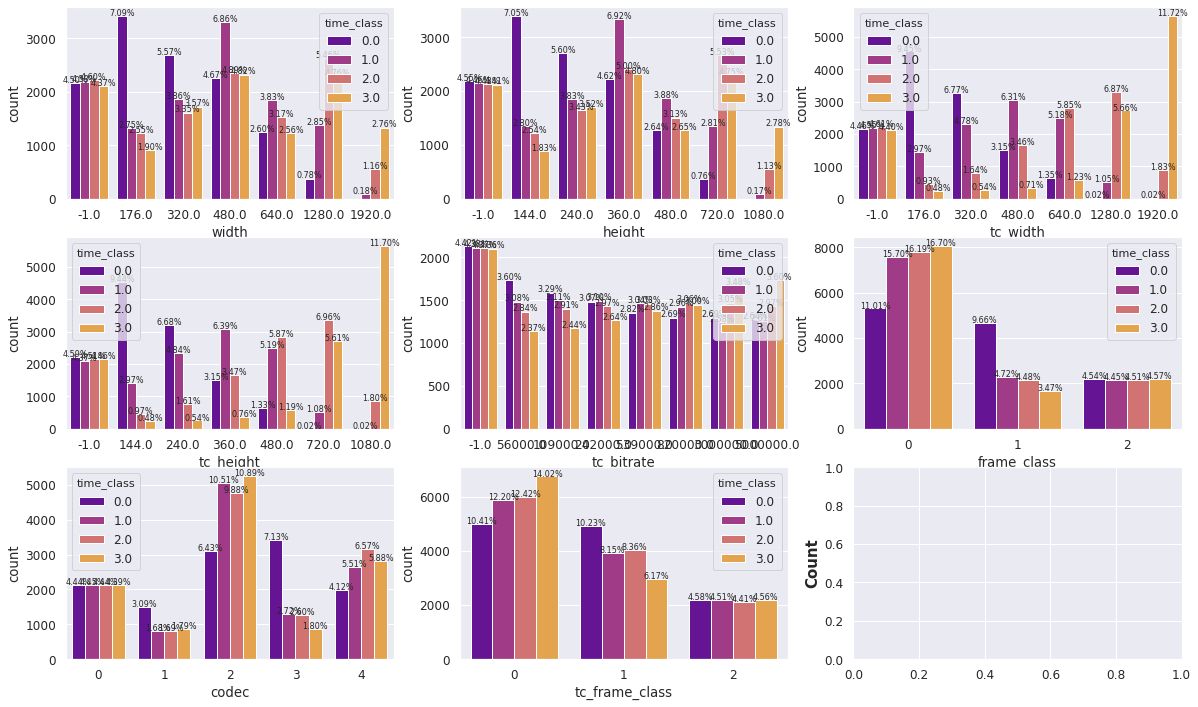

In [46]:
plotFrequency(cats)

## Target Encoding

In [47]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()

    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [48]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

In [49]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

In [50]:
train_post2['Area'] = train_post2['width'] * train_post2['height']
train_post2['bitrate'] = train_post2['bitrate'] * 0.125 # Change bit into bytes
test_post2['Area'] = test_post2['width'] * test_post2['height']
test_post2['bitrate'] = test_post2['bitrate'] * 0.125 # Change bit into bytes

train_post2.head()

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,...,tc_width,tc_height,tc_frame_class,tc_bitrate,tc_time,time_class,width_mean,height_mean,bitrate_mean,Area
0,1,282.6,640.0,480.0,0,-0.125,-1.0,6920.0,7065.0,-1.0,...,-1.0,360.0,1,3000000.0,-1.00,0.0,319.5,420.0,1499999.5,307200.0
1,2,339.7,640.0,480.0,0,-0.125,181.0,10010.0,10191.0,-1.0,...,1920.0,-1.0,0,820000.0,5.64,3.0,1280.0,239.5,409999.5,307200.0
2,3,239.1,480.0,360.0,0,62524.750,-1.0,5868.0,-1.0,1406751.0,...,640.0,480.0,2,539000.0,-1.00,2.0,560.0,420.0,519599.0,172800.0
3,4,714.4,1280.0,720.0,0,81544.500,143.0,-1.0,-1.0,14532530.0,...,1280.0,720.0,0,5000000.0,80.68,3.0,1280.0,720.0,2826178.0,921600.0
4,5,645.8,320.0,240.0,2,11987.875,138.0,16008.0,16146.0,-1.0,...,320.0,240.0,0,56000.0,-1.00,0.0,320.0,240.0,75951.5,76800.0


In [51]:
cats.remove('width')
cats.remove('height')
cats.remove('tc_width')
cats.remove('tc_height')
cats.remove('tc_bitrate')
cats

['frame_class', 'codec', 'tc_frame_class']

In [52]:
cats.append('width_mean')
cats.append('height_mean')
cats.append('bitrate_mean')
cats

['frame_class',
 'codec',
 'tc_frame_class',
 'width_mean',
 'height_mean',
 'bitrate_mean']

In [53]:
# cats.remove('time_class')
cats.append('Area')
cats

['frame_class',
 'codec',
 'tc_frame_class',
 'width_mean',
 'height_mean',
 'bitrate_mean',
 'Area']

In [54]:
test_post2.drop(['time_class','video','tc_time'],axis=1, inplace=True)
train_post2.drop(['video','tc_time'],axis=1, inplace=True)

test_post2.head()

,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,width_mean,height_mean,bitrate_mean,Area
0,256.2,176.0,-1.0,1,7195.625,56.0,3018.0,-1.0,302900.0,1540700.0,1843600.0,3,1920.0,-1.0,0,-1.0,1048.0,-1.0,28782.0,-176.0
1,74.5,176.0,144.0,1,-0.125,15.0,879.0,-1.0,-1.0,491276.0,515272.0,3,176.0,144.0,0,820000.0,176.0,144.0,409999.5,25344.0
2,-1.0,-1.0,144.0,1,6713.375,37.0,2091.0,2128.0,100969.0,1089548.0,1190517.0,3,480.0,360.0,1,3000000.0,239.5,252.0,1526853.5,-144.0
3,282.6,640.0,-1.0,0,69979.250,145.0,6920.0,-1.0,4966509.0,-1.0,-1.0,2,1920.0,-1.0,0,820000.0,1280.0,-1.0,689917.0,-640.0
4,-1.0,320.0,240.0,0,34034.125,23.0,1081.0,1104.0,-1.0,1354404.0,-1.0,0,480.0,360.0,0,539000.0,400.0,300.0,405636.5,76800.0


In [55]:
for cat in cats:
    train_enc, test_enc = mean_target_encoding(train_post2,test_post2,'time_class',cat)
    train_post2[cat + '_enc'] = train_enc
    test_post2[cat + '_enc'] = test_enc
    train_post2.drop(cat, axis=1,inplace=True)
    test_post2.drop(cat, axis=1,inplace=True)



In [56]:
train_post2.drop('frame_class_enc', axis=1, inplace=True)
test_post2.drop('frame_class_enc', axis=1, inplace=True)

In [57]:
X2 = train_post2.drop('time_class',axis=1)

In [58]:
display(X2.head(2))
display(test_post2.head(2))

,duration,width,height,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate,codec_enc,tc_frame_class_enc,width_mean_enc,height_mean_enc,bitrate_mean_enc,Area_enc
0,282.6,640.0,480.0,-0.125,-1.0,6920.0,7065.0,-1.0,14806840.0,19773349.0,-1.0,360.0,3000000.0,1.664662,1.314872,1.469771,1.416143,1.599617,1.467369
1,339.7,640.0,480.0,-0.125,181.0,10010.0,10191.0,-1.0,820261.0,-1.0,1920.0,-1.0,820000.0,1.494040,1.612731,2.695873,1.501424,1.560301,1.473324


,duration,width,height,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate,codec_enc,tc_frame_class_enc,width_mean_enc,height_mean_enc,bitrate_mean_enc,Area_enc
0,256.2,176.0,-1.0,7195.625,56.0,3018.0,-1.0,302900.0,1540700.0,1843600.0,1920.0,-1.0,-1.0,0.935539,1.612669,2.543366,1.461885,1.078943,0.959121
1,74.5,176.0,144.0,-0.125,15.0,879.0,-1.0,-1.0,491276.0,515272.0,176.0,144.0,820000.0,0.935539,1.612669,0.007801,0.009005,1.538928,0.946168


In [59]:
X2.drop(['width','height','bitrate'],axis=1,inplace=True)

In [61]:
X2.head()

,duration,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate,codec_enc,tc_frame_class_enc,width_mean_enc,height_mean_enc,bitrate_mean_enc,Area_enc
0,282.6,-1.0,6920.0,7065.0,-1.0,14806840.0,19773349.0,-1.0,360.0,3000000.0,1.664662,1.314872,1.469771,1.416143,1.599617,1.467369
1,339.7,181.0,10010.0,10191.0,-1.0,820261.0,-1.0,1920.0,-1.0,820000.0,1.494040,1.612731,2.695873,1.501424,1.560301,1.473324
2,239.1,-1.0,5868.0,-1.0,1406751.0,13545526.0,14952277.0,640.0,480.0,539000.0,1.667526,1.498845,1.438374,1.425816,1.459708,1.471019
3,714.4,143.0,-1.0,-1.0,14532530.0,43720516.0,58253046.0,1280.0,720.0,5000000.0,1.646587,1.611456,2.686978,2.734088,2.105171,2.041280
4,645.8,138.0,16008.0,16146.0,-1.0,6660941.0,7742262.0,320.0,240.0,56000.0,1.638092,1.615617,0.271913,0.265749,1.352892,1.301216


In [60]:
test_post2.drop(['width','height','bitrate'],axis=1,inplace=True)
test_post2.head()

,duration,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate,codec_enc,tc_frame_class_enc,width_mean_enc,height_mean_enc,bitrate_mean_enc,Area_enc
0,256.2,56.0,3018.0,-1.0,302900.0,1540700.0,1843600.0,1920.0,-1.0,-1.0,0.935539,1.612669,2.543366,1.461885,1.078943,0.959121
1,74.5,15.0,879.0,-1.0,-1.0,491276.0,515272.0,176.0,144.0,820000.0,0.935539,1.612669,0.007801,0.009005,1.538928,0.946168
2,-1.0,37.0,2091.0,2128.0,100969.0,1089548.0,1190517.0,480.0,360.0,3000000.0,0.935539,1.318174,1.343154,0.331001,1.098080,0.919695
3,282.6,145.0,6920.0,-1.0,4966509.0,-1.0,-1.0,1920.0,-1.0,820000.0,1.668895,1.612669,2.690321,1.461885,1.515449,1.453207
4,-1.0,23.0,1081.0,1104.0,-1.0,1354404.0,-1.0,480.0,360.0,539000.0,1.496014,1.612669,0.765254,0.776804,1.532349,1.300741


In [62]:
X2.to_csv('train_done.csv')
test_post2.to_csv('test_done.csv')

In [71]:
scores = 0
np.random.seed(1)
# META CODE
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler


In [ ]:

clf = OneVsRestClassifier(XGBClassifier())

# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.

for i,(train_index, test_index) in enumerate(skf.split(X2,target)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    clf.fit(X_train,y_train)
    scores += clf.score(X_test,y_test)
    
print(scores/4)

dengan target encoding: 0.828 --> lebih kecil dari no target encoding 0.83
<t> tanpa frame_class : 0.829
<t> 0.8488

dengan target encoding: 0.256 --> lebih kcil dari no target encoding 0.281
<t> sma aja tanpa frameclass
<t> 0.7146 --> dengan mengambil rata2 dari width,height,bitrate
<t> 0.7149 --> drop width height feature

In [66]:
clf = OneVsRestClassifier(XGBClassifier())

ext = OneVsRestClassifier(ExtraTreesClassifier())
svc = OneVsRestClassifier(SVC(kernel='sigmoid', gamma=1.0, probability=True))
lgr = OneVsRestClassifier(LogisticRegression())
nb = OneVsRestClassifier(MultinomialNB())
xgb = OneVsRestClassifier(XGBClassifier(n_estimators=250))
lgbm = OneVsRestClassifier(LGBMClassifier(n_estimators = 250))
rf = OneVsRestClassifier(RandomForestClassifier(criterion='gini',
                            n_estimators=1750,
                            max_depth=7,
                            min_samples_split=6,
                            min_samples_leaf=6,
                            max_features='auto',
                            oob_score=True,
                            random_state=42,
                            n_jobs=-1,
                            verbose=0))

In [67]:
def get_oof(clf, x_tr, y_tr, x_test):
    
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    # Cross validation
    for i,(train_index, test_index) in enumerate(skf.split(x_tr,y_tr)):
        X_train, X_valid = x_tr.iloc[train_index], x_tr.iloc[test_index] 
        y_train, y_valid = y_tr.iloc[train_index], y_tr.iloc[test_index]

        clf.fit(X_train, y_train)
        oof_train[test_index] = clf.predict_proba(X_valid)[:,1]
        oof_test_skf[i,:] = clf.predict_proba(x_test)[:,1]
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [68]:
display(X2.head(2))
display(test_post2.head(2))

,duration,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate,codec_enc,tc_frame_class_enc,width_mean_enc,height_mean_enc,bitrate_mean_enc,Area_enc
0,282.6,-1.0,6920.0,7065.0,-1.0,14806840.0,19773349.0,-1.0,360.0,3000000.0,1.664662,1.314872,1.469771,1.416143,1.599617,1.467369
1,339.7,181.0,10010.0,10191.0,-1.0,820261.0,-1.0,1920.0,-1.0,820000.0,1.494040,1.612731,2.695873,1.501424,1.560301,1.473324


,duration,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate,codec_enc,tc_frame_class_enc,width_mean_enc,height_mean_enc,bitrate_mean_enc,Area_enc
0,256.2,56.0,3018.0,-1.0,302900.0,1540700.0,1843600.0,1920.0,-1.0,-1.0,0.935539,1.612669,2.543366,1.461885,1.078943,0.959121
1,74.5,15.0,879.0,-1.0,-1.0,491276.0,515272.0,176.0,144.0,820000.0,0.935539,1.612669,0.007801,0.009005,1.538928,0.946168


In [72]:
std = StandardScaler()
X2_scaled = std.fit_transform(X2)
X2_scaled = pd.DataFrame(X2_scaled,columns = X2.columns)
X2_scaled.head()

,duration,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate,codec_enc,tc_frame_class_enc,width_mean_enc,height_mean_enc,bitrate_mean_enc,Area_enc
0,0.181493,-0.979339,0.266983,0.264740,-0.571892,-0.071881,-0.012122,-1.038849,-0.150514,1.102366,0.664952,-1.375161,-0.028756,-0.091778,0.260578,-0.065962
1,0.394259,1.164642,0.790023,0.781827,-0.571892,-0.370532,-0.411214,2.001370,-1.197397,-0.198003,-0.002548,0.902940,1.406222,0.008388,0.164510,-0.051367
2,0.019403,-0.979339,0.088913,-0.904083,-0.225310,-0.098813,-0.109427,-0.024388,0.197480,-0.365619,0.676155,0.031912,-0.065503,-0.080417,-0.081284,-0.057017
3,1.790468,0.716998,-0.904525,-0.904083,3.008496,0.545505,0.764525,0.988491,0.893469,2.295365,0.594238,0.893188,1.395811,1.456207,1.495878,1.340674
4,1.534851,0.658097,1.805297,1.766874,-0.571892,-0.245818,-0.254949,-0.530827,-0.498508,-0.653728,0.561005,0.925012,-1.430679,-1.442967,-0.342285,-0.473197


In [73]:
std = StandardScaler()
test_post2_scaled = std.fit_transform(test_post2)
test_post2_scaled = pd.DataFrame(test_post2_scaled,columns = X2.columns)
test_post2_scaled.head()

,duration,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate,codec_enc,tc_frame_class_enc,width_mean_enc,height_mean_enc,bitrate_mean_enc,Area_enc
0,0.101042,-0.267004,-0.353042,-0.835524,-0.485987,-0.347941,-0.369029,1.998615,-1.169179,-0.671622,-2.195867,0.913718,1.236585,-0.049539,-1.000497,-1.308157
1,-0.576144,-0.718154,-0.690823,-0.835524,-0.559441,-0.369971,-0.394785,-0.743025,-0.753584,-0.177543,-2.195867,0.913718,-1.766999,-1.774043,0.126404,-1.339996
2,-0.857529,-0.476074,-0.499430,-0.503434,-0.534956,-0.357412,-0.381692,-0.265124,-0.134491,1.135983,-2.195867,-1.371669,-0.185164,-1.391847,-0.953613,-1.405070
3,0.199434,0.712322,0.263143,-0.835524,0.644949,-0.380284,-0.404777,1.998615,-1.169179,-0.177543,0.694268,0.913718,1.410664,-0.049539,0.068884,-0.093646
4,-0.857529,-0.630125,-0.658924,-0.663162,-0.559441,-0.351852,-0.404777,-0.265124,-0.134491,-0.346855,0.012949,0.913718,-0.869734,-0.862700,0.110286,-0.468422


In [ ]:
svc_oof_X2, svc_oof_X2_test_post2 = get_oof(svc,X2_scaled,target,test_post2_scaled) # SVC
lgr_oof_X2, lgr_oof_X2_test_post2 = get_oof(lgr,X2_scaled,target,test_post2_scaled) # LogisticRegression

eX2t_oof_X2, eX2t_oof_X2_test_post2 = get_oof(ext,X2,target,test_post2) # EX2traTrees
nb_oof_X2 ,nb_oof_X2_test_post2 = get_oof(nb,X2,target,test_post2) # Naive Batargettargetes
X2gb_oof_X2, X2gb_oof_X2_test_post2 = get_oof(xgb,X2,target,test_post2) # X2gboost
lgbm_oof_X2, lgbm_oof_X2_test_post2 = get_oof(lgbm,X2,target,test_post2) # LightGBM
rf_oof_X2, rf_oof_X2_test_post2 = get_oof(rf,X2,target,test_post2) # RandomForest

In [ ]:
X2_train = np.concatenate((eX2t_oof_X2,svc_oof_X2,lgr_oof_X2,X2gb_oof_X2,lgbm_oof_X2, rf_oof_X2),aX2is=1)
X2_test = np.concatenate((eX2t_oof_X2_test,svc_oof_X2_test,lgr_oof_X2_test,X2gb_oof_X2_test,lgbm_oof_X2_test,rf_oof_X2_test),aX2is=1)

In [ ]:
base_predictions_train = pd.DataFrame( {

    'EX2traTrees': eX2t_oof_X2.ravel(),
    'SVC': svc_oof_X2.ravel(),
    'LogisticRegression': lgr_oof_X2.ravel(),
    'NaiveBayes': nb_oof_X2.ravel(),
    'X2gboost': X2gb_oof_X2.ravel(),
    'LightGBM': lgbm_oof_X2.ravel(),
    'RandomForest': rf_oof_X2.ravel()})

base_predictions_train.head()

In [ ]:
# Display numerical correlations between features on heatmap
sns.set(font_scale=1.1)
correlation_train = base_predictions_train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1)

plt.show()

In [ ]:
X2_train = np.concatenate((eX2t_oof_X2,svc_oof_X2,lgr_oof_X2,X2gb_oof_X2,lgbm_oof_X2, rf_oof_X2),aX2is=1)
X2_test = np.concatenate((eX2t_oof_X2_test,svc_oof_X2_test,lgr_oof_X2_test,X2gb_oof_X2_test,lgbm_oof_X2_test,rf_oof_X2_test),aX2is=1)

## Tes

In [ ]:
train_post3 = train_post.copy()
test_post3 = test_post.copy()
X3 = X.copy()

In [ ]:
X3.head()

In [ ]:
X3.drop('frame_class',axis=1,inplace=True)
test_post3.drop('frame_class',axis=1,inplace=True)

In [ ]:
X3['Area'] = X3['width'] * X3['height']
test_post['Area'] = test_post['width'] * test_post['height']


In [ ]:
# X3.drop(['total_frame'],axis=1,inplace=True)
# X3.drop(['total_size'],axis=1,inplace=True)
#gaknaik

In [ ]:
X3.head()

In [ ]:
X3['bitrate'] = X3['bitrate'] * 0.125 # Change bit into bytes

In [ ]:
# X3['tcArea'] = X3['tc_width'] * X3['tc_height']
# test_post['tcArea'] = test_post['tc_width'] * test_post['tc_height']
#gak naik

In [ ]:
X3.head()

In [ ]:
scores = 0
np.random.seed(1)

for i,(train_index, test_index) in enumerate(skf.split(X3,target)):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    xgb.fit(X_train,y_train)
    scores += xgb.score(X_test,y_test)
    
print(scores/4)

membuat fitur area = width*area nambah score 0.8316
<t> 0.831166 dgn membuang total frame dan total size
<t> 0.8487 : missing value =-1